# IMM - Taller 11 (26/11/2024)




---
---
## 2. Ejercicio para entregar

El *blackjack* es uno de los juegos de cartas más populares. En el juego tradicional se usa una baraja francesa que se compone de 52 cartas. El repartidor entrega dos cartas a cada uno de los jugadores, quienes buscan tener una mejor jugada que el repartidor. De la baraja 4 cartas son "As" y su valor es 1 u 11 puntos según decida el jugador, 16 cartas son "10" o "figuras" ($J$, $Q$ , $K$) cuyo valor es 10 y las 32 cartas restantes son números del "2" al "9", cuyos valores son el número que representan.

El objetivo del juego es lograr la mayor cantidad de puntos, que es la suma de las cartas recibidas, sin exceder 21. Un *blackjack* es la jugada ganadora por excelencia, y consta de una carta con valor de 10 puntos y un 'As' (con valor de 11 puntos).

En este ejercicio se simulará una versión modificada de este juego para analizar el concepto de probabilidad mediante el enfoque frecuentista. En esta versión, el "As" solo vale 11, se tienen dos barajas separadas y de cada una de ellas se escoge al azar una carta. Se quiere evaluar la probabilidad de obtener cada uno de los siguientes resultados en un solo intento:
- Resultado $A:\, N_{\rm puntos} = 21$, es decir, *blackjack*
- Resultado $B:\, N_{\rm puntos} = 4$
- Resultado $C:\, N_{\rm puntos} < 12$
- Resultado $D:\, N_{\rm puntos} \ge 16$

**Problema:**

1. Escriba una función que haga uso de la función $\texttt{choice()}$ de la librería $\texttt{random}$ y simule una jugada de *blackjack modificado*. Guarde el resultado obtenido para cada una de $N_{\rm rep}$ repeticiones independientes de la jugada.
2. Evalue la probabilidad $P_{\rm frec}$ de que ocurra el resultado $A$ al realizar $N_{\rm rep}$ jugadas independientes
3. Realice un gráfico en el cual se muestre la probabilidad porcentual de que ocurra el resultado $A$ para diferentes valores de $N_{\rm rep}$. Verifique que a mayor $N_{\rm rep}$ esta probabilidad se aproxima a la probabilidad clásica, $P_{\rm clas} \simeq 4.74\%$.
4. Usando los resultados almacenados construya un histograma en el que se muestre la probabilidad frecuentista de los posibles resultados del juego.
5. Evalúe la probabilidad de obtener cada uno de los resultados $B$, $C$ y $D$.  Compare estos valores con los correspondientes definidos a través del enfoque clásico.


**Solucion:**

La probabilidad de obtener un total de $21 $ al sacar una carta de cada baraja se puede calcular utilizando el enfoque clásico de la probabilidad.

En el caso del juego modificado, hay un total de $2704$ posibles combinaciones de cartas con resultados entre $4$ y $22$ puntos. Para obtener un total de $21$ puntos,  hay $128$ combinaciones posibles: $16$ valores $10$ en la primera baraja y $4$ valores de "As" en la segunda baraja, lo que da un total de 64 posibilidades. Como también se tiene el caso inverso, $4$ valores de "As" en la primera baraja y $16$ valores $10$ en la segunda baraja, se completan 128.

Por lo tanto, la probabilidad de obtener un total de $21$ es $P(A) =  128/2704 \simeq 0.0473$, o equivalentemente, $4.73$%.

- *Punto 1:*

In [62]:
# Punto 1 - Función para una jugada
import random
import matplotlib.pyplot as plt

baraja = [2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 11] * 8  # Cartas del 1 al 9, Figuras=10, As=11

# Función que simular una jugada de blackjack modificado
def simular_jugada():
    # Seleccionar dos cartas aleatorias de la baraja
    carta_1 = random.choice(baraja)
    # segunda carta (ten cuidado con el random.choice para que no se repita la carta)
    carta_2 = random.choice(baraja)
    
    # Sumar los valores de las dos cartas
    puntos = carta_1 + carta_2
    return puntos

# Probar la función
resultado = simular_jugada()
resultado


18

- *Punto 2:*

In [86]:
# Paso 2: Evaluar la probabilidad frecuentista de obtener un blackjack (21 puntos)

def calcular_probabilidad_blackjack(n_repeticiones):
    conteo_blackjack = 0
    for _ in range(n_repeticiones):
        if simular_jugada() == 21:
            conteo_blackjack += 1
    probabilidad = conteo_blackjack / n_repeticiones
    return probabilidad

# Calcular la probabilidad para un número N de repeticiones
n_repeticiones = 10000  
probabilidad_blackjack = calcular_probabilidad_blackjack(n_repeticiones)
probabilidad_blackjack





0.0471

- *Punto 3:*

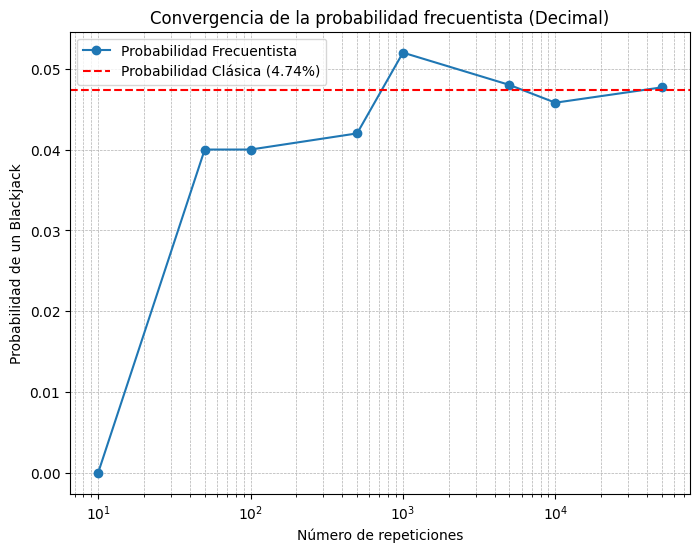

In [114]:
import matplotlib.pyplot as plt

# Paso 3: Graficar la probabilidad de obtener un blackjack para diferentes valores de N_repeticiones

def graficar_probabilidad_blackjack():
    repeticiones = [10, 50, 100, 500, 1000, 5000, 10000, 50000]
    probabilidades = [calcular_probabilidad_blackjack(n) for n in repeticiones]
    probabilidad_clasica = (4.74 / 100)  # Probabilidad clásica esperada (4.74%)
    
    # Crear el gráfico
    plt.figure(figsize=(8, 6))
    plt.plot(repeticiones, probabilidades, marker='o', label='Probabilidad Frecuentista')
    plt.axhline(y=probabilidad_clasica, color='r', linestyle='--', label='Probabilidad Clásica (4.74%)')
    plt.xscale('log')
    plt.xlabel('Número de repeticiones')
    plt.ylabel('Probabilidad de un Blackjack')
    plt.title('Convergencia de la probabilidad frecuentista (Decimal)')
    plt.legend()
    plt.grid(True, which="both", linestyle='--', linewidth=0.5)
    plt.show()

# Llamar a la función para generar el gráfico
graficar_probabilidad_blackjack()




- *Punto 4:*

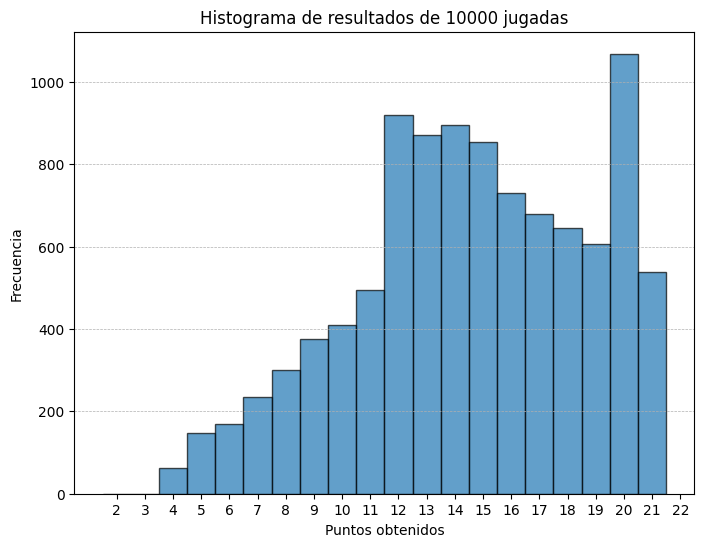

In [115]:
# Punto 4 - Probabilidad porcentual (histograma)
# Construir un histograma de los posibles resultados del juego

def generar_histograma(n_repeticiones):
    resultados = [simular_jugada() for _ in range(n_repeticiones)]  # Generar resultados de las jugadas
    plt.figure(figsize=(8, 6))
    plt.hist(resultados, bins=range(2, 23), edgecolor='black', alpha=0.7, align='left')
    plt.xlabel('Puntos obtenidos')
    plt.ylabel('Frecuencia')
    plt.title(f'Histograma de resultados de {n_repeticiones} jugadas')
    plt.xticks(range(2, 23))
    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    plt.show()

# Generar el histograma para 10,000 jugadas
generar_histograma(10000)





- *Punto 5:*

El enfoque clásico indica que:

- $P_{\rm clas}(B)   = \frac{16}{2704}  \simeq 0.006  \equiv 0.6\%$

- $P_{\rm clas}(C) =   \frac{576}{2704} \simeq 0.213 \equiv 21.3\%$

- $P_{\rm clas}(D) =    \frac{1168}{2704} \simeq 0.432 \equiv 43.7\%$


In [116]:
# Paso 5: Evaluar la probabilidad de obtener resultados B, C y D

def calcular_probabilidades_especificas(n_repeticiones):
    conteo_b = 0  # N_puntos = 4
    conteo_c = 0  # N_puntos < 12
    conteo_d = 0  # N_puntos >= 16
    
    for _ in range(n_repeticiones):
        puntos = simular_jugada()
        if puntos == 4:
            conteo_b += 1
        if puntos < 12:
            conteo_c += 1
        if puntos >= 16:
            conteo_d += 1
    
    probabilidad_b = conteo_b / n_repeticiones
    probabilidad_c = conteo_c / n_repeticiones
    probabilidad_d = conteo_d / n_repeticiones
    
    return probabilidad_b, probabilidad_c, probabilidad_d

# Calcular probabilidades para 10,000 repeticiones
n_repeticiones = 10000
probabilidad_b, probabilidad_c, probabilidad_d = calcular_probabilidades_especificas(n_repeticiones)
print(f'Enfoque clásico vs frecuentista:')
print(f'---------------------------------')
print(f'Obtener 4 puntos:')
print(f'clásica = 0.47%  -  frecuentista={probabilidad_b*100:.2f} %')
print(f'Obtener menos de 12 puntos:')
print(f'clásica = 21.3 %  -  frecuentista={probabilidad_c*100:.2f} %')
print(f'Obtener 16 o más puntos:')
print(f'clásica = 43.7 %  -  frecuentista={probabilidad_d*100:.2f} %')





Enfoque clásico vs frecuentista:
---------------------------------
Obtener 4 puntos:
clásica = 0.47%  -  frecuentista=0.44 %
Obtener menos de 12 puntos:
clásica = 21.3 %  -  frecuentista=21.30 %
Obtener 16 o más puntos:
clásica = 43.7 %  -  frecuentista=43.33 %


## El resultado que se obtuvo se puede ver en la siguiente tabla:

|   Caso    |       P Clásica       |    P Frecuentista aprox.   |
|-----------|-----------------------|----------------------------|
| B         | 0.6%                  | 0.71%                      |
| C         | 21.3%                 | 21.03%                     |
| D         | 43.7%                 | 43.36%                     |
